# DATA MINING
## NGUYEN XUAN VIET DUC - 22280012
### Final assignment

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs

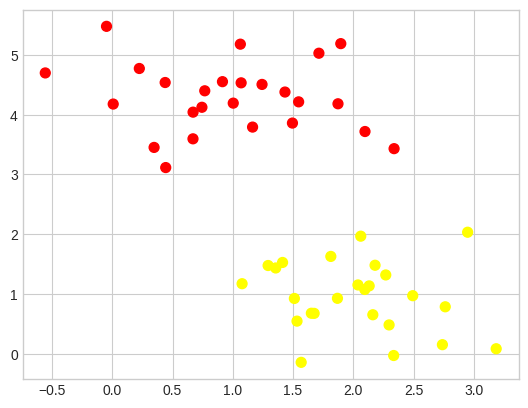

In [6]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

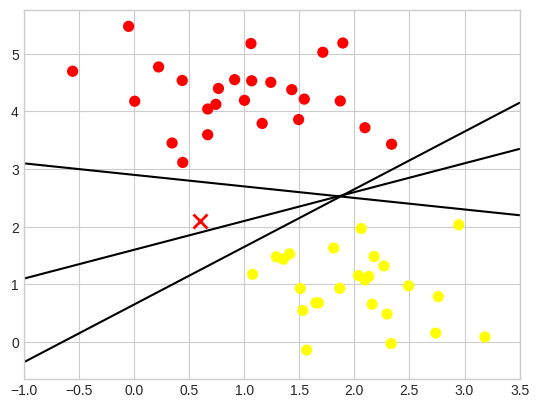

In [7]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

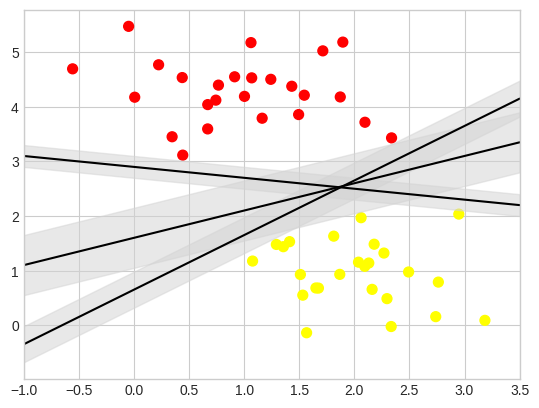

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()

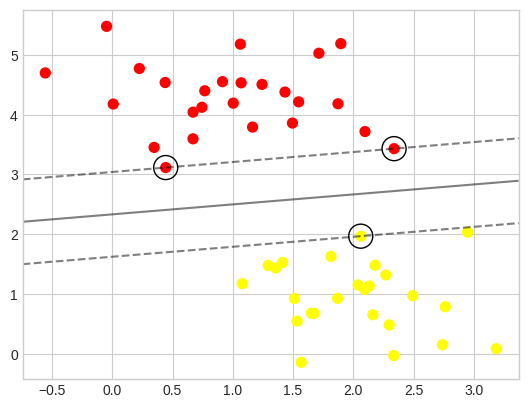

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [9]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_

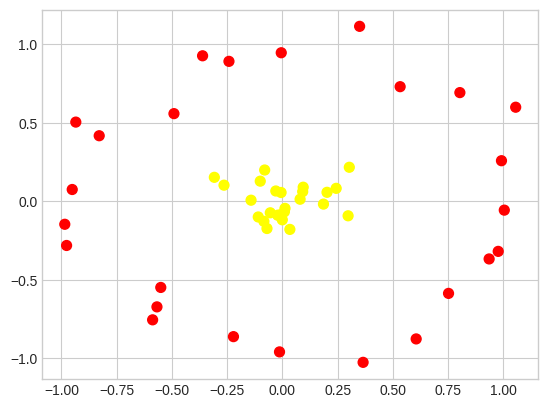

In [10]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

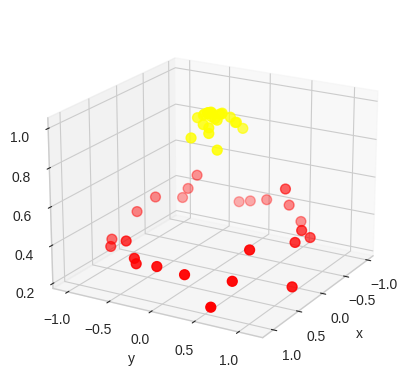

In [11]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

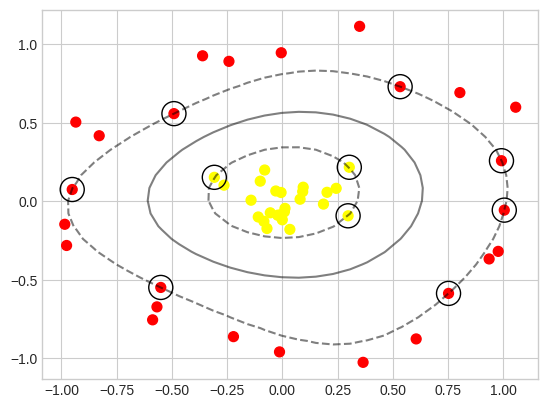

array([[ 1.00367544, -0.0577296 ],
       [ 0.99095323,  0.25706205],
       [ 0.75145685, -0.58799496],
       [-0.55036748, -0.55010891],
       [-0.49079942,  0.55693801],
       [-0.95103527,  0.07370759],
       [ 0.53249516,  0.72858328],
       [ 0.29707664, -0.09373934],
       [ 0.30254269,  0.2153178 ],
       [-0.30809665,  0.15131888]])

In [12]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_

## SVC với dữ liệu banknote authentication

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

banknote_data = fetch_openml(name='banknote-authentication', version=1, as_frame=True)

X = banknote_data.data.values
y = banknote_data.target.values

In [28]:
banknote_data

{'data':            V1        V2       V3       V4
 0     3.62160   8.66610  -2.8073 -0.44699
 1     4.54590   8.16740  -2.4586 -1.46210
 2     3.86600  -2.63830   1.9242  0.10645
 3     3.45660   9.52280  -4.0112 -3.59440
 4     0.32924  -4.45520   4.5718 -0.98880
 ...       ...       ...      ...      ...
 1367  0.40614   1.34920  -1.4501 -0.55949
 1368 -1.38870  -4.87730   6.4774  0.34179
 1369 -3.75030 -13.45860  17.5932 -2.77710
 1370 -3.56370  -8.38270  12.3930 -1.28230
 1371 -2.54190  -0.65804   2.6842  1.19520
 
 [1372 rows x 4 columns],
 'target': 0       1
 1       1
 2       1
 3       1
 4       1
        ..
 1367    2
 1368    2
 1369    2
 1370    2
 1371    2
 Name: Class, Length: 1372, dtype: category
 Categories (2, object): ['1', '2'],
 'frame':            V1        V2       V3       V4 Class
 0     3.62160   8.66610  -2.8073 -0.44699     1
 1     4.54590   8.16740  -2.4586 -1.46210     1
 2     3.86600  -2.63830   1.9242  0.10645     1
 3     3.45660   9.52280  -4.01

In [29]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]], shape=(1372, 4))

In [30]:
y

['1', '1', '1', '1', '1', ..., '2', '2', '2', '2', '2']
Length: 1372
Categories (2, object): ['1', '2']

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PC1: 0.5450 (0.5450 tích lũy)
PC2: 0.3233 (0.8683 tích lũy)
PC3: 0.0878 (0.9561 tích lũy)
PC4: 0.0439 (1.0000 tích lũy)


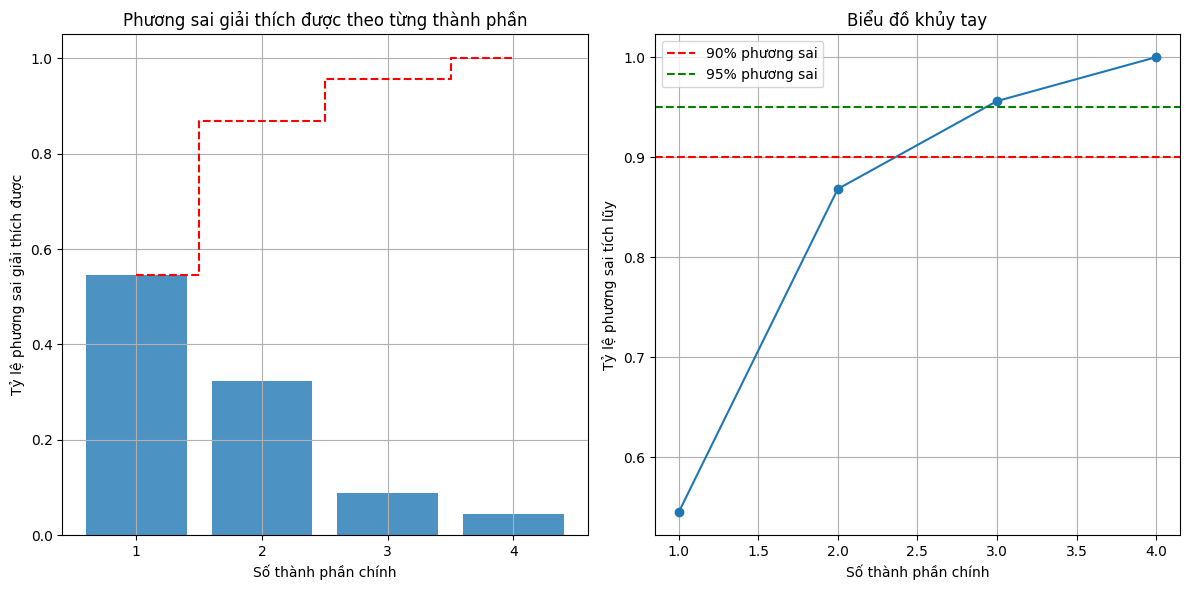

In [37]:
n_features = X.shape[1]

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, n_features + 1), explained_variance, alpha=0.8, align='center')
plt.step(range(1, n_features + 1), cumulative_variance, where='mid', color='red', linestyle='--')
plt.ylabel('Tỷ lệ phương sai giải thích được')
plt.xlabel('Số thành phần chính')
plt.title('Phương sai giải thích được theo từng thành phần')
plt.xticks(range(1, n_features + 1))
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_features + 1), cumulative_variance, '-o')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỷ lệ phương sai tích lũy')
plt.title('Biểu đồ khủy tay')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% phương sai')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% phương sai')
plt.legend()

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} tích lũy)")

plt.tight_layout()
plt.show()

### PCA với 2 components

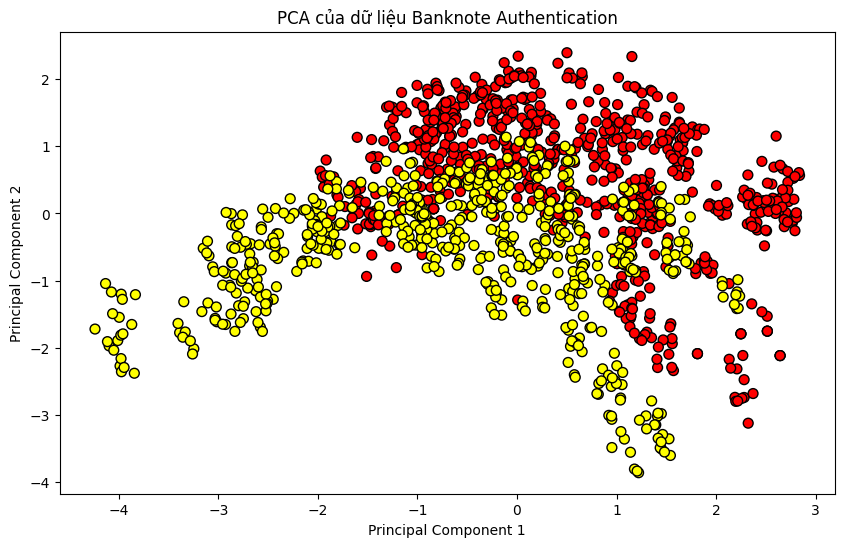

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='autumn', edgecolor='k')
plt.title('PCA của dữ liệu Banknote Authentication')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

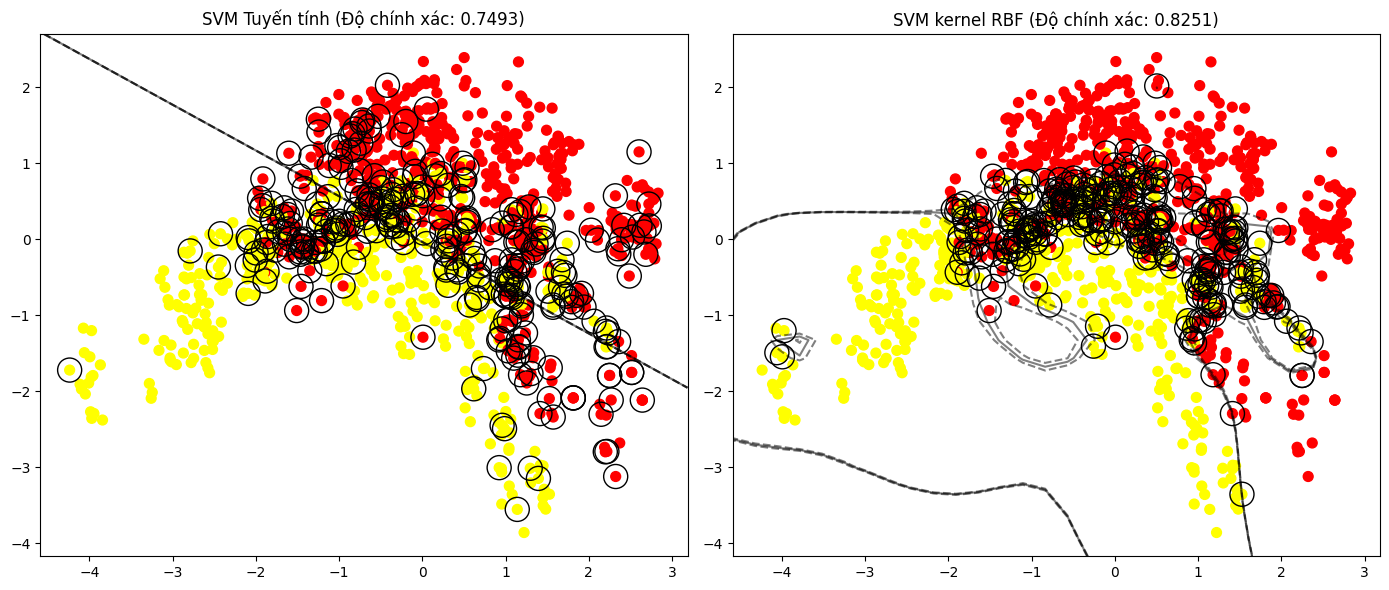

Số lượng support vectors (SVM tuyến tính): 317
Số lượng support vectors (SVM kernel RBF): 324


In [35]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y, test_size=0.25, random_state=42
)

linear_model = SVC(kernel='linear', C=1E10)
linear_model.fit(X_pca_train, y_pca_train)
linear_score = linear_model.score(X_pca_test, y_pca_test)

rbf_model = SVC(kernel='rbf', C=1E6)
rbf_model.fit(X_pca_train, y_pca_train)
rbf_score = rbf_model.score(X_pca_test, y_pca_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# SVM tuyến tính
ax1.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_pca_train, s=50, cmap='autumn')
plot_svc_decision_function(linear_model, ax=ax1)
ax1.set_title(f'SVM Tuyến tính (Độ chính xác: {linear_score:.4f})')

# SVM kernel RBF
ax2.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=y_pca_train, s=50, cmap='autumn')
plot_svc_decision_function(rbf_model, ax=ax2)
ax2.set_title(f'SVM kernel RBF (Độ chính xác: {rbf_score:.4f})')

plt.tight_layout()
plt.show()

print(f"Số lượng support vectors (SVM tuyến tính): {len(linear_model.support_vectors_)}")
print(f"Số lượng support vectors (SVM kernel RBF): {len(rbf_model.support_vectors_)}")

In [36]:
linear_full = SVC(kernel='linear', C=1.0)
linear_full.fit(X_train, y_train)
linear_full_score = linear_full.score(X_test, y_test)

rbf_full = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_full.fit(X_train, y_train)
rbf_full_score = rbf_full.score(X_test, y_test)

print(f"\nĐộ chính xác trên toàn bộ đặc trưng:")
print(f"SVM tuyến tính: {linear_full_score:.4f}")
print(f"SVM kernel RBF: {rbf_full_score:.4f}")


Độ chính xác trên toàn bộ đặc trưng:
SVM tuyến tính: 0.9883
SVM kernel RBF: 1.0000


### PCA với 3 components

Phương sai giải thích được bởi từng thành phần: [0.54497602 0.32328872 0.08784561]
Tổng phương sai giải thích được: 0.9561


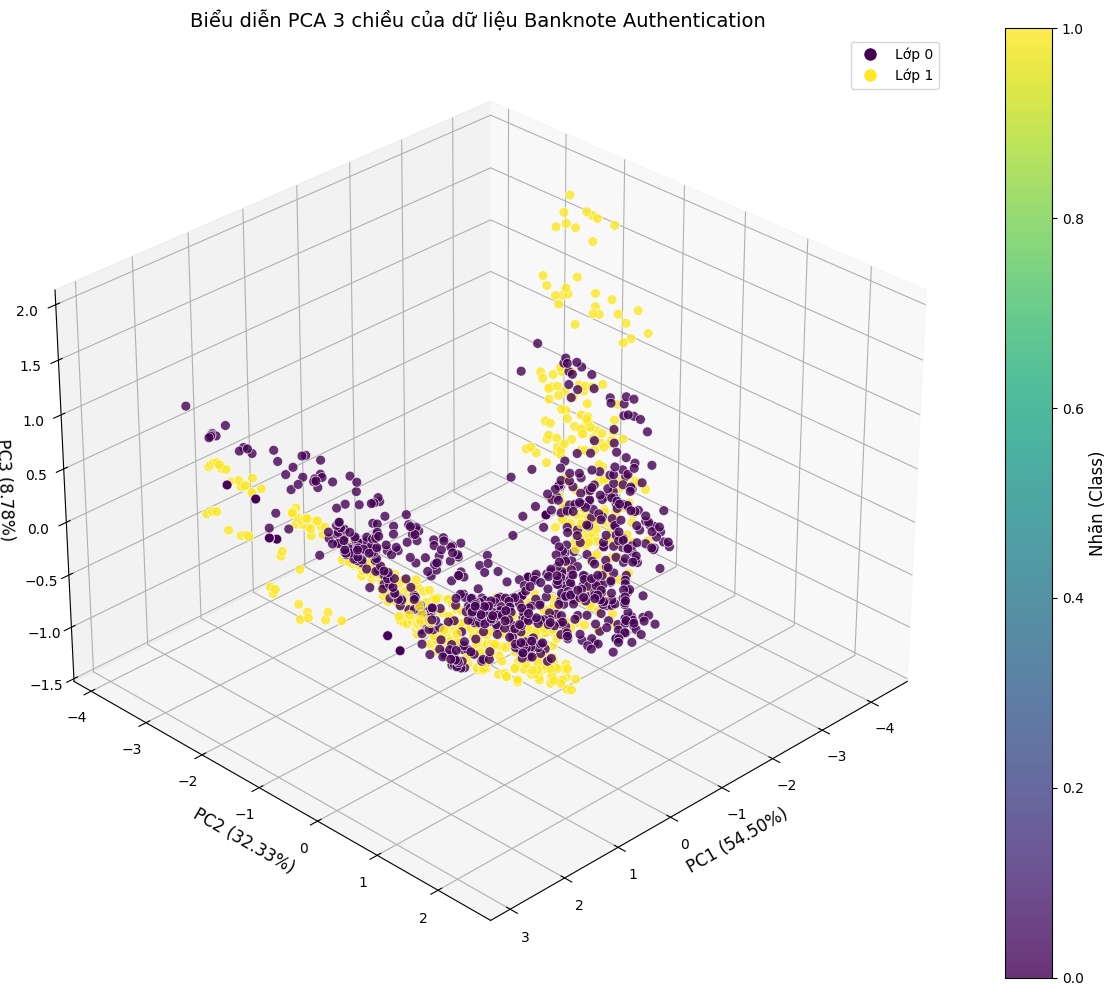

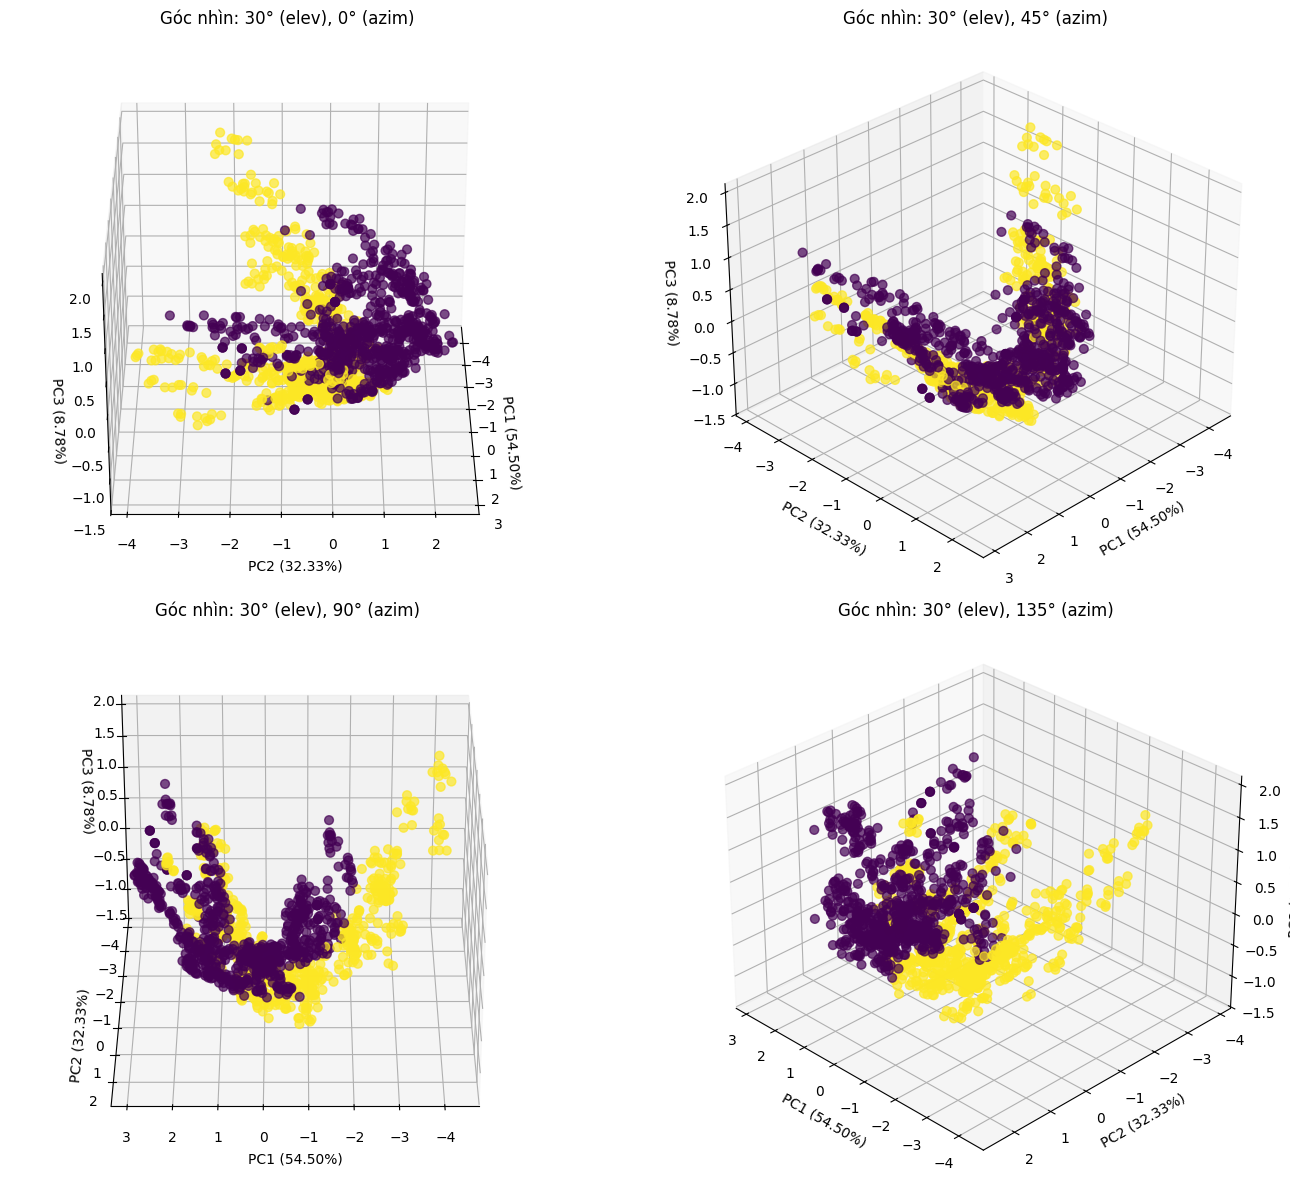

In [40]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Phương sai giải thích được bởi từng thành phần: {explained_variance}")
print(f"Tổng phương sai giải thích được: {sum(explained_variance):.4f}")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], 
    X_pca_3d[:, 1], 
    X_pca_3d[:, 2],
    c=y, 
    cmap='viridis', 
    marker='o', 
    s=50, 
    alpha=0.8,
    edgecolor='w',
    linewidth=0.5
)

ax.set_title('Biểu diễn PCA 3 chiều của dữ liệu Banknote Authentication', fontsize=14)
ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})', fontsize=12)

colorbar = plt.colorbar(scatter)
colorbar.set_label('Nhãn (Class)', fontsize=12)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                   markerfacecolor=scatter.cmap(scatter.norm(c)), 
                   markersize=10, label=f'Lớp {i}') 
                   for i, c in enumerate(np.unique(y))]
ax.legend(handles=legend_elements, loc='best')

ax.view_init(elev=30, azim=45)

ax.grid(True)

plt.tight_layout()
plt.show()

views = [(30, 0), (30, 45), (30, 90), (30, 135)]
fig = plt.figure(figsize=(15, 12))

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    scatter = ax.scatter(
        X_pca_3d[:, 0], 
        X_pca_3d[:, 1], 
        X_pca_3d[:, 2],
        c=y, 
        cmap='viridis', 
        marker='o', 
        s=40, 
        alpha=0.7
    )
    
    ax.set_title(f'Góc nhìn: {elev}° (elev), {azim}° (azim)', fontsize=12)
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
    ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')
    
    ax.view_init(elev=elev, azim=azim)
    ax.grid(True)

plt.tight_layout()
plt.show()

Độ chính xác của SVM tuyến tính: 0.9096
Độ chính xác của SVM kernel RBF: 0.9213
Số lượng support vectors (SVM tuyến tính): 242
Số lượng support vectors (SVM kernel RBF): 238


/tmp/ipykernel_142787/3710313730.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


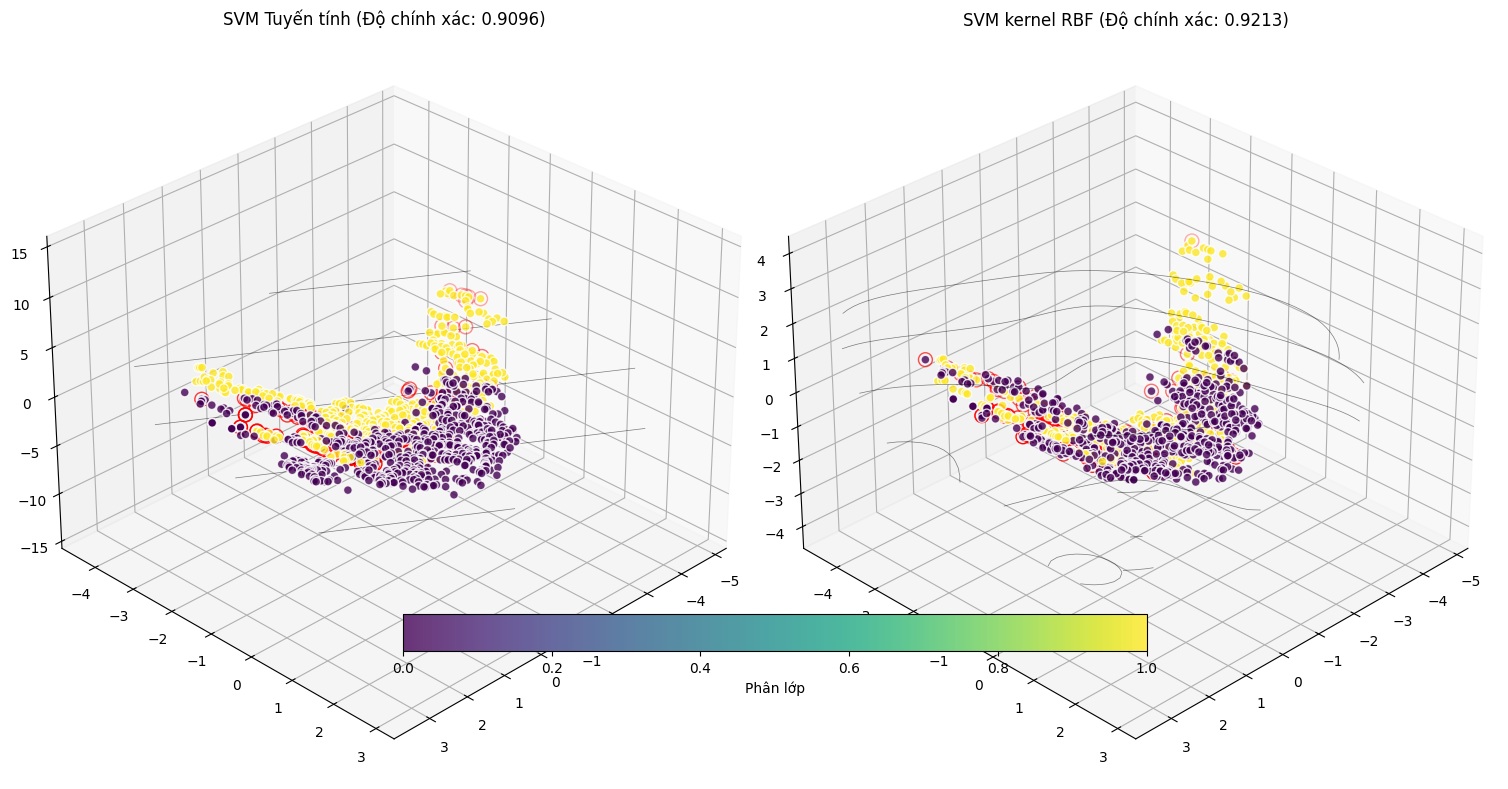

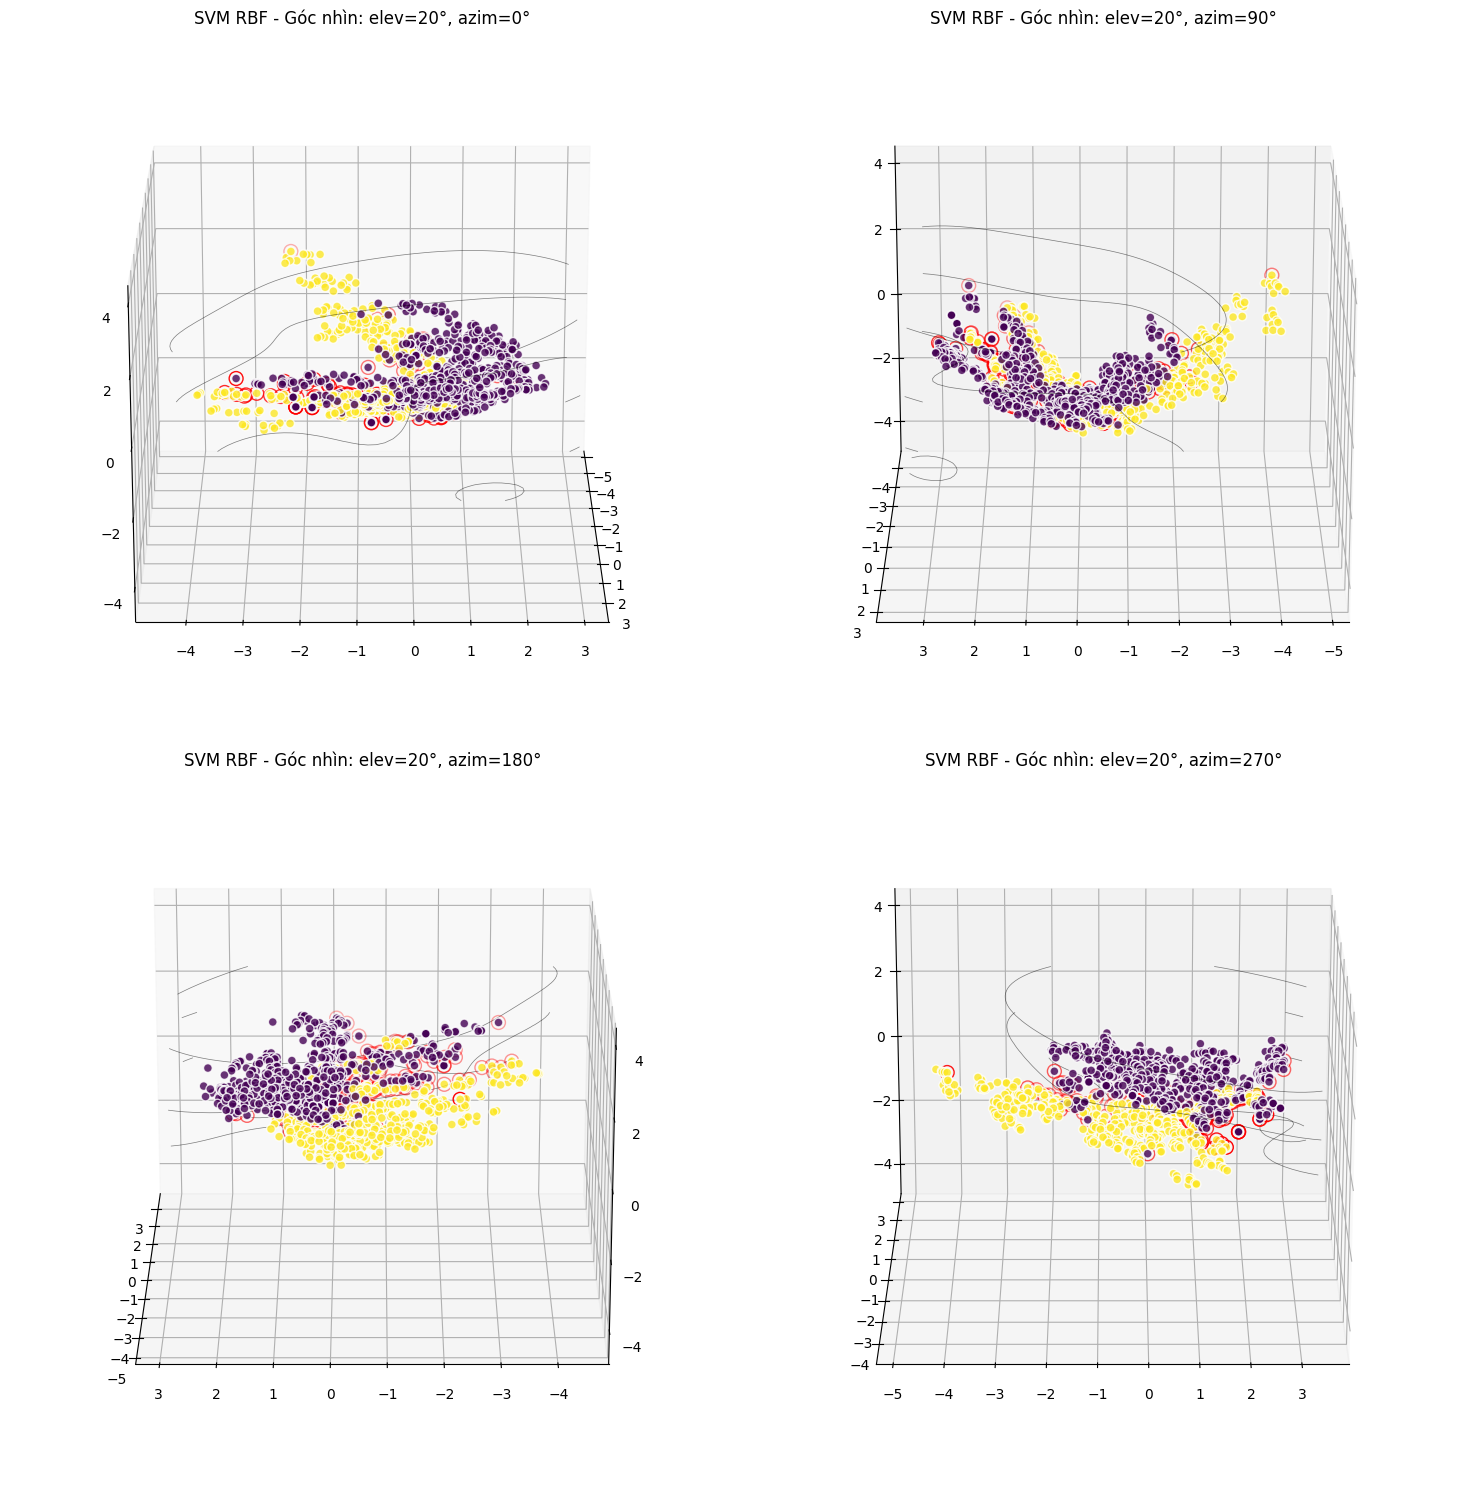

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_3d, y, test_size=0.25, random_state=42)

# Huấn luyện mô hình SVM tuyến tính
linear_model = SVC(kernel='linear', C=1)
linear_model.fit(X_train, y_train)
linear_score = linear_model.score(X_test, y_test)

# Huấn luyện mô hình SVM với kernel RBF
rbf_model = SVC(kernel='rbf', C=1)
rbf_model.fit(X_train, y_train)
rbf_score = rbf_model.score(X_test, y_test)

print(f"Độ chính xác của SVM tuyến tính: {linear_score:.4f}")
print(f"Độ chính xác của SVM kernel RBF: {rbf_score:.4f}")

def plot_decision_surface_3d(model, ax, grid_resolution=20):
    # Xác định phạm vi cho mỗi trục
    x_min, x_max = X_pca_3d[:, 0].min() - 0.5, X_pca_3d[:, 0].max() + 0.5
    y_min, y_max = X_pca_3d[:, 1].min() - 0.5, X_pca_3d[:, 1].max() + 0.5
    z_min, z_max = X_pca_3d[:, 2].min() - 0.5, X_pca_3d[:, 2].max() + 0.5
    
    xx, yy, zz = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution),
        np.linspace(z_min, z_max, grid_resolution)
    )
    
    grid_points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
    Z = model.decision_function(grid_points).reshape(xx.shape)
    
    ax.contour(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], levels=[0], colors='k', alpha=0.5, linestyles=['-'])
    
    ax.scatter(
        X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
        c=y, cmap='viridis', marker='o', s=40, alpha=0.8, edgecolors='w'
    )
    
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        model.support_vectors_[:, 2],
        s=100, linewidth=1, facecolors='none', edgecolors='red'
    )
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

def plot_decision_planes(model, ax, num_planes=5):
    # Xác định phạm vi cho mỗi trục
    x_min, x_max = X_pca_3d[:, 0].min() - 0.5, X_pca_3d[:, 0].max() + 0.5
    y_min, y_max = X_pca_3d[:, 1].min() - 0.5, X_pca_3d[:, 1].max() + 0.5
    z_min, z_max = X_pca_3d[:, 2].min() - 0.5, X_pca_3d[:, 2].max() + 0.5
    
    z_planes = np.linspace(z_min, z_max, num_planes)
    
    for z_val in z_planes:
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 50),
            np.linspace(y_min, y_max, 50)
        )
        
        zz = np.full_like(xx, z_val)
        grid_points = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
        Z = model.decision_function(grid_points).reshape(xx.shape)
        
        ax.contour(xx, yy, Z, levels=[0], colors='k', alpha=0.5, linestyles=['-'], 
                  linewidths=0.5, zdir='z', offset=z_val)
    
    scatter = ax.scatter(
        X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
        c=y, cmap='viridis', marker='o', s=40, alpha=0.8, edgecolors='w'
    )
    
    # Vẽ support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        model.support_vectors_[:, 2],
        s=100, linewidth=1, facecolors='none', edgecolors='red'
    )
    
    return scatter

fig = plt.figure(figsize=(16, 8))

# SVM tuyến tính
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = plot_decision_planes(linear_model, ax1)
ax1.set_title(f'SVM Tuyến tính (Độ chính xác: {linear_score:.4f})')
ax1.view_init(elev=30, azim=45)

# SVM kernel RBF
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = plot_decision_planes(rbf_model, ax2)
ax2.set_title(f'SVM kernel RBF (Độ chính xác: {rbf_score:.4f})')
ax2.view_init(elev=30, azim=45)

cbar = plt.colorbar(scatter1, ax=[ax1, ax2], orientation='horizontal', pad=0.1, shrink=0.6)
cbar.set_label('Phân lớp')

print(f"Số lượng support vectors (SVM tuyến tính): {len(linear_model.support_vectors_)}")
print(f"Số lượng support vectors (SVM kernel RBF): {len(rbf_model.support_vectors_)}")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 15))
views = [(20, 0), (20, 90), (20, 180), (20, 270)]

for i, (elev, azim) in enumerate(views, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    plot_decision_planes(rbf_model, ax, num_planes=4)
    ax.set_title(f'SVM RBF - Góc nhìn: elev={elev}°, azim={azim}°')
    ax.view_init(elev=elev, azim=azim)

plt.tight_layout()
plt.show()